In [1]:
from IPython.display import YouTubeVideo

# Identificación del aplicador sobre MRI: Segmentación del aplicador 

Como ya comentamos en la introducción, no pensamos que podamos obtener directamente las transformaciones afines de las imágenes y es por ello que buscamos una segmentación intermedia del aplicador sobre la MRI. 

```{admonition} Puntualización
:class: tip
Existen publicaciones como esta referencia {cite}`andrearczyk2020local` que habría que explorar. Parece que existen CNNs que identifican rotaciones en imágenes, pero creo que tienen un esquema similar a las topologías de red típicas.
```

## Plataformas

Como recien llegados al mundo del deep learning, no tenemos todavía claro qué librería usar. Por lo que hemos visto las predominantes son [Tensorflow](https://www.tensorflow.org/) y [Pytorch](https://pytorch.org/). Por otra parte sabemos de la existencia de la plataforma de NVIDIA llamada [Clara](https://developer.nvidia.com/clara) que está pensada para uso médico y que puede integrar a las dos anteriores. 

### Video demostrativo del uso de Clara Toolkits

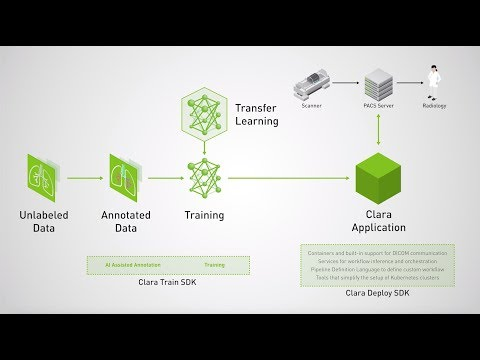

In [2]:
YouTubeVideo('T0Pjki4vXx0', width=515, height=290)

## Candidatas a redes

Revisando los modelos de segmentación mediante redes neuronales convolucionales (CNN), pensamos que las topologías de red adecuadas serían U-net{cite}`DBLP:journals/corr/RonnebergerFB15` o su equivalente en 3D V-net{cite}`7785132`

````{panels}

```{figure} https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png
Esquema de la topología de red U-net
```
---

```{figure} https://vitalab.github.io/article/images/vnet/vnet.png

V-net. La diferencia frente a U-net es que utiliza kernels de 3x3x3
```

````

En una búsqueda de internet rápida se ve que los dos modelos están implementados tanto en Tensorflow como en Pytorch.

```{note}
Ejemplos en Tensorflow para [u-net](https://github.com/jakeret/tf_unet) y [v-net](https://github.com/jackyko1991/vnet-tensorflow). En el caso de Pytorch
[u-net](https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/) y [v-net](https://github.com/mattmacy/vnet.pytorch)
```

## Hardware

Está claro que para la fase de entrenamiento un hardware potente que permita la paralelización del cálculo es la clave para reducir el tiempo de entrenamiento, pero de momento no lo hemos dimensionado. El uso de más de una GPU parece que no es opcional.

## Número de casos para entrenar

Por la literatura, vemos que con el adecuado uso del Transfer learning, entre 100 y 200 secuencias anotadas parecen ser suficientes. Por otra parte, recordemos que la estructura que buscamos segmentar en la imagen es rígida y conocida, por lo que es posible que incluso con menos casos fuese suficiente.